In [5]:
import pickle
import os

import pandas as pd
import numpy as np

In [9]:
rrsp = "results_DF_RRS.pkl"
bralip = "results_DF_bralibase.pkl"
strandp = "results_DF_rnastrand.pkl"
spap = "results_DF_rnaspa.pkl"
origp = "results_DF_bear_orig.pkl"

rrs = pickle.load( open(rrsp, 'rb'))
brali = pickle.load( open(bralip, 'rb'))
strand = pickle.load( open(strandp, 'rb'))
spa = pickle.load( open(spap, 'rb'))
orig = pickle.load( open(origp, 'rb'))

df = pd.concat([rrs,brali,strand,spa,orig]).reset_index().drop('index', axis=1)
df.sample(10)

,IDS,dataset,matrix,bonus,SPS
3270900,>RF02030_BX950851.1/4236584-4236712|RF02030_AB...,RRS,qbear_90,0.5,0.641791
4457790,>RF01192_BAAE01004788.1/3214-3131|RF01192_AAWZ...,RRS,zbear_62,1.6,0.840909
8171771,>RF00163_AF036392.1/121-168|RF00163_Z69699.1/3...,rnastrand,zbear_90,0.7,0.711538
4579227,>RF00237_AAVX01065791.1/2124-2183|RF00237_AAFR...,RRS,zbear_62,2.7,0.600000
3796642,>RF00618_AAPN01427475.1/38-163|RF00618_ABAV010...,RRS,qbear_90,5.4,0.217687
1507682,>RF02004_ACMX01000066.1/11688-11492|RF02004_AB...,RRS,bear_90,3.0,0.241546
5405131,>RF02002_CABD01362204.1/591-483|RF02002_CABD01...,RRS,zbear_90,0.4,0.954545
6519880,>RF00163_AF036391.1/121-168|RF00163_L07513.1/8...,rnastrand,bear_62,0.5,0.958333
7842042,>RF00164_AJ619580.1/109-151|RF00164_L06252.1/3...,rnastrand,zbear_62,0.6,1.000000
3333961,>RF01967_ABRQ01017964.1/458-660|RF01967_AAGW01...,RRS,qbear_90,1.1,0.413793


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with sns.plotting_context('paper', font_scale=1.2):

    for meth in df.matrix.unique():
        plt.clf()
        g=sns.pointplot(x='bonus', y='SPS', hue='dataset', data=df[df.matrix==meth],
                       markers=['x','o','v','^'], scale=0.3,
                       linestyles=["-", "--", ":", "-."])
        g.set_ylim([0,1.01])
        # iterate over axes of FacetGrid
        g.set_title(meth)
        labels = g.get_xticklabels() # get x labels
        for i,l in enumerate(labels):
            if(i%2 == 0): labels[i] = '' # skip even labels
        g.set_xticklabels(labels, rotation=90) # set new labels
        g.set_xlabel('bonus',)
        plt.savefig(f'plots/{meth}_bonus_SPS.pdf')

plt.clf()

In [17]:
###find maximum meanSPS over bonus for each method and dataset, then bar plot that value
from collections import defaultdict
d = defaultdict(list)
for mat in df.matrix.unique():
    for dataset in df.dataset.unique():
        
        best = df[df.matrix == mat][df.dataset == dataset].groupby('bonus').mean().max()
        d[mat].append(best)

/Users/marcop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [23]:
d
df.dataset.unique()

array(['RRS', 'bralibase', 'rnastrand', 'rnaspa'], dtype=object)

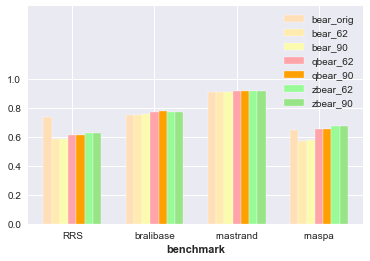

In [66]:
with sns.plotting_context(font_scale=1.4):
    # set width of bar
    barWidth = 0.1
    # Set position of bar on X axis
    r1 = np.arange(len(d['bear_orig']))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    r6 = [x + barWidth for x in r5]
    r7 = [x + barWidth for x in r6]

    # Make the plot
    plt.bar(r1, d['bear_orig'],color = "#ffdfb8", width=barWidth, edgecolor='white', label='bear_orig')
    plt.bar(r2, d['bear_62'],color = "#ffebaf", width=barWidth, edgecolor='white', label='bear_62')
    plt.bar(r3, d['bear_90'],color = "#fafbad", width=barWidth, edgecolor='white', label='bear_90')
    plt.bar(r4, d['qbear_62'],color = "#ffa5aa", width=barWidth, edgecolor='white', label='qbear_62')
    plt.bar(r5, d['qbear_90'],color = "#fea100", width=barWidth, edgecolor='white', label='qbear_90')
    plt.bar(r6, d['zbear_62'],color = "#98FB98", width=barWidth, edgecolor='white', label='zbear_62')
    plt.bar(r7, d['zbear_90'],color = "#98e587", width=barWidth, edgecolor='white', label='zbear_90')

    # Add xticks on the middle of the group bars
    plt.xlabel('benchmark', fontweight='bold')
    plt.xticks([r+0.2+barWidth for r in range(len(d['bear_orig']))], ['RRS', 'bralibase', 'rnastrand', 'rnaspa'])
    plt.ylim([0,1.5])
    plt.yticks(np.arange(0,1.01,0.2))
    # Create legend & Show graphic
    plt.legend()
    plt.savefig('plots/SPS_all.pdf')

    plt.show()


In [45]:
a = [1,2,3,4,5,6]
b = [5,2,30,4,5,6]

tmp = pd.DataFrame([a,b], columns=['a','b','c','d','e','f'])
tmp.iloc[1].sort_values(ascending=False).index[:3]

Index(['c', 'f', 'e'], dtype='object')